#Covid detection using cnn

In [ ]:
#Allow google drive access

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set path

TRAIN_PATH="/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Train"
VAL_PATH="/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val"

In [ ]:
#importing libraries we need

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.models import Sequential

In [ ]:
##BUILDING  CNN based model in KERAS ( we will create 4 cnn layers and then multiple classification layer)

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))         #ADD, 32 feature extractor in 1st layer , default kernel size,size ou is 224*224 and 3 channel(colour=RGB)
model.add(Conv2D(64,(3,3),activation='relu'))                                             #ADD another layer of filters
model.add(MaxPooling2D(pool_size=(2,2)))                                                  #add max pooling layer default size is 2,2
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#ADD Flatten and dense layer
model.add(Flatten())                                                                       #means we are making an array of pixels that represent an image
model.add(Dense(64,activation='relu'))                                                      #
model.add(Dropout(0.5))                                                                    #we are dropping 50% neuron so to decrease complexity & prevent overfitting
model.add(Dense(1,activation="sigmoid"))

#using 1 neuron cause it is a binary classification
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#Train from scratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)


In [ ]:
#for train 
train_generator=train_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
#for validation 
validation_generator=train_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
#
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
7/8 [=========================>....] - 114s 16s/step - loss: 1.3286 - accuracy: 0.4732 - val_loss: 0.6887 - val_accuracy: 0.5000


In [ ]:
model.save("model_adv.h5")


In [ ]:
#Showing accuracy of train and validation

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.6887504458427429, 0.5]

In [ ]:
model.evaluate_generator(validation_generator)

[0.688441812992096, 0.5]

Test images [ YAHAN TAK KAAM KHATAM , ABB BAS YE VISUALISATION KA PART HAI ]

In [ ]:
model=load_model("model_adv.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_test=[]


In [ ]:
for i in os.listdir("/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val/Normal"):
  img=image.load_img("/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir("/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val/Covid"):
  img=image.load_img("/content/drive/My Drive/Colab Notebooks/covid_19/CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

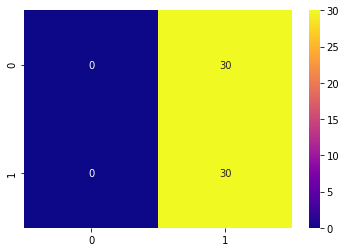

In [ ]:
sns.heatmap(cm , cmap="plasma",annot=True)